## EDA notebook

This notebook contains exploratory data analysis on the train.csv file.  There are histograms of feature frequency (color sorted by gender), a numerical feature correlation heatmap, and scatter plots of Calories vs each numerical feature (color sorted by gender).  After some feature engineering, this process is repeated to examine the relevence of the new features.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("train_comp.csv")

train.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,36,189,82,26,101,41.0,150
1,female,64,163,60,8,85,39.7,34
2,female,51,161,64,7,84,39.8,29
3,male,20,192,90,25,105,40.7,140
4,female,38,166,61,25,102,40.6,146


Histograms of feature frequency (color sorted by gender).

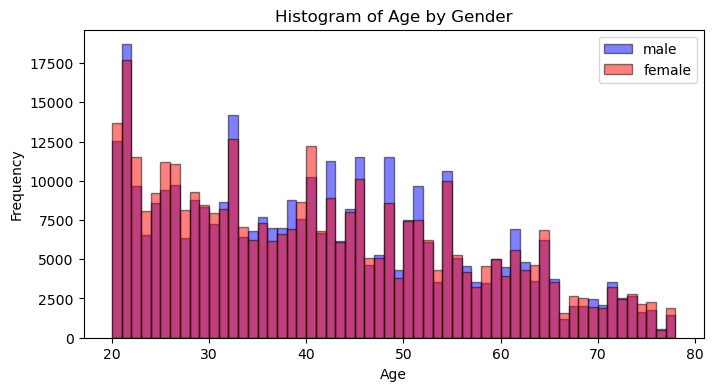

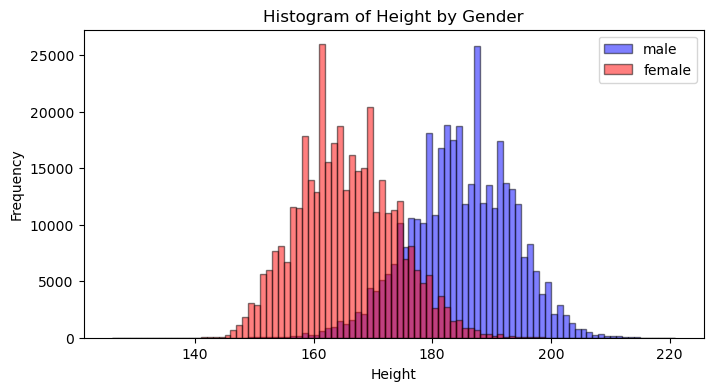

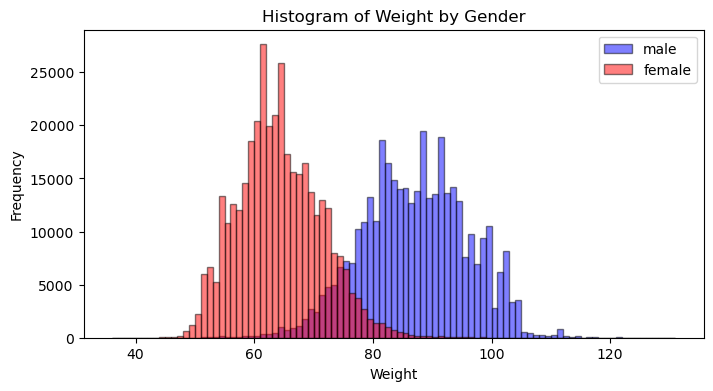

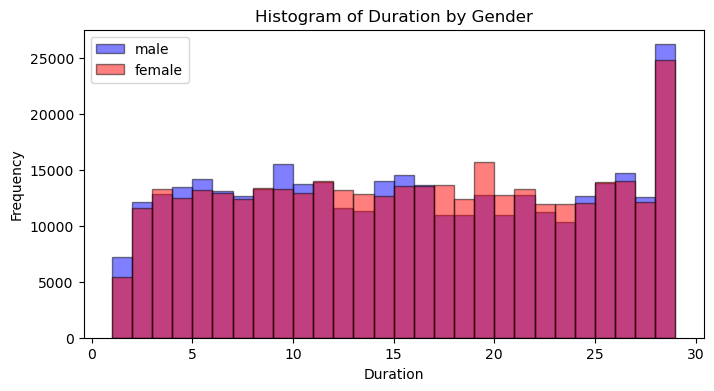

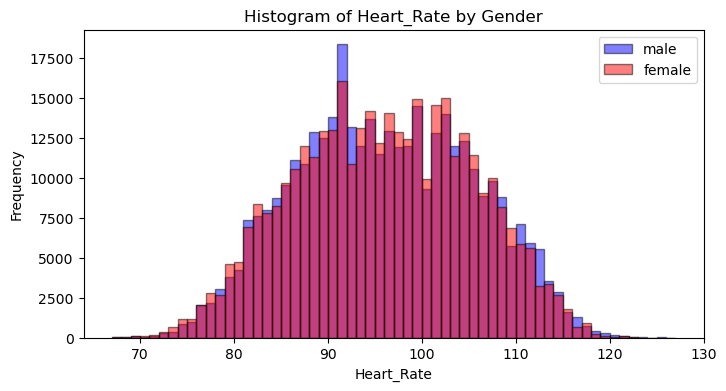

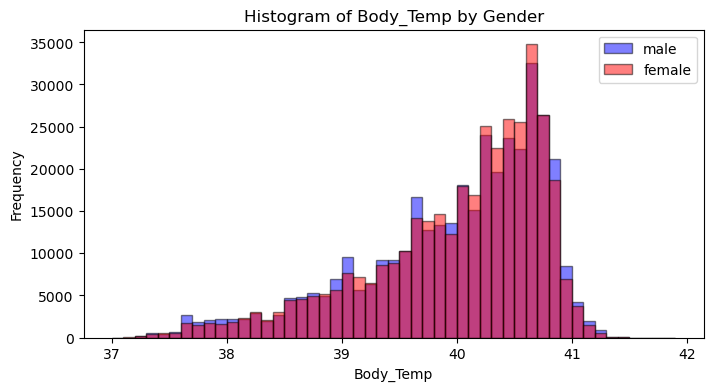

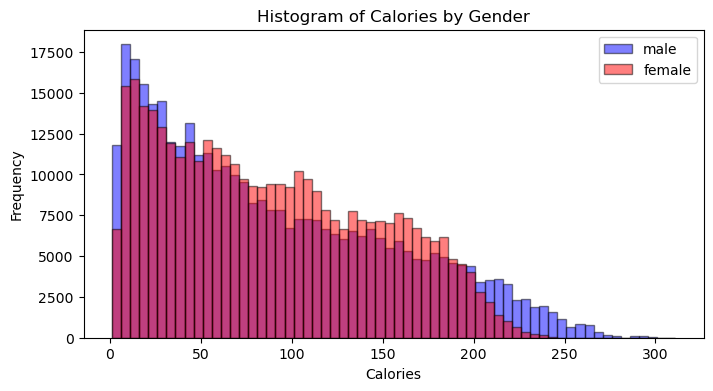

In [9]:
# bin dictionary
bin_dict = {
    'Age': range(np.min(train['Age']), np.max(train['Age']), 1),
    'Height': range(np.min(train['Height']), np.max(train['Height']), 1),
    'Weight': range(np.min(train['Weight']), np.max(train['Weight']), 1),
    'Duration': range(np.min(train['Duration']), np.max(train['Duration']), 1),
    'Heart_Rate': range(np.min(train['Heart_Rate']), np.max(train['Heart_Rate']), 1),
    'Body_Temp': np.arange(np.floor(np.min(train['Body_Temp'])), np.ceil(np.max(train['Body_Temp'])), 0.1),
    'Calories': range(np.min(train['Calories']), np.max(train['Calories']), 5)
}

# Assign different colors for each sex
colors = {'male': 'blue', 'female': 'red'}

for column in train.columns:
    if pd.api.types.is_numeric_dtype(train[column]):
        plt.figure(figsize=(8, 4))

        bins = bin_dict.get(column)

        # Plot histogram for each gender
        for gender in train['Sex'].dropna().unique():
            subset = train[train['Sex'] == gender]
            plt.hist(subset[column].dropna(), bins=bins, alpha=0.5, label=gender, color=colors.get(gender), edgecolor='black')

        plt.title(f'Histogram of {column} by Gender')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(False)
        # plt.tight_layout()
        plt.show()

Feature correlation heatmap.

In [10]:
train.corr(numeric_only=True)

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.011975,0.073690,0.015656,0.017037,0.030275,0.145683
Height,0.011975,1.000000,0.957967,-0.029936,-0.013234,-0.034641,-0.004026
Weight,0.073690,0.957967,1.000000,-0.020845,-0.002384,-0.023717,0.015863
Duration,0.015656,-0.029936,-0.020845,1.000000,0.875327,0.903066,0.959908
Heart_Rate,0.017037,-0.013234,-0.002384,0.875327,1.000000,0.795972,0.908748
Body_Temp,0.030275,-0.034641,-0.023717,0.903066,0.795972,1.000000,0.828671
Calories,0.145683,-0.004026,0.015863,0.959908,0.908748,0.828671,1.000000


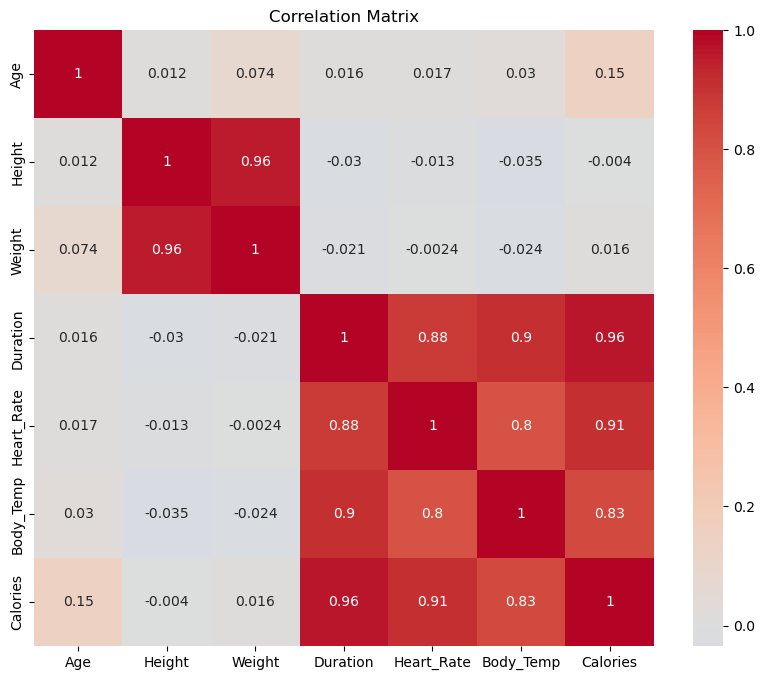

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

Scatter plot of each numerical feature and Calories, where blue/red corresponds to male/female, respectively.

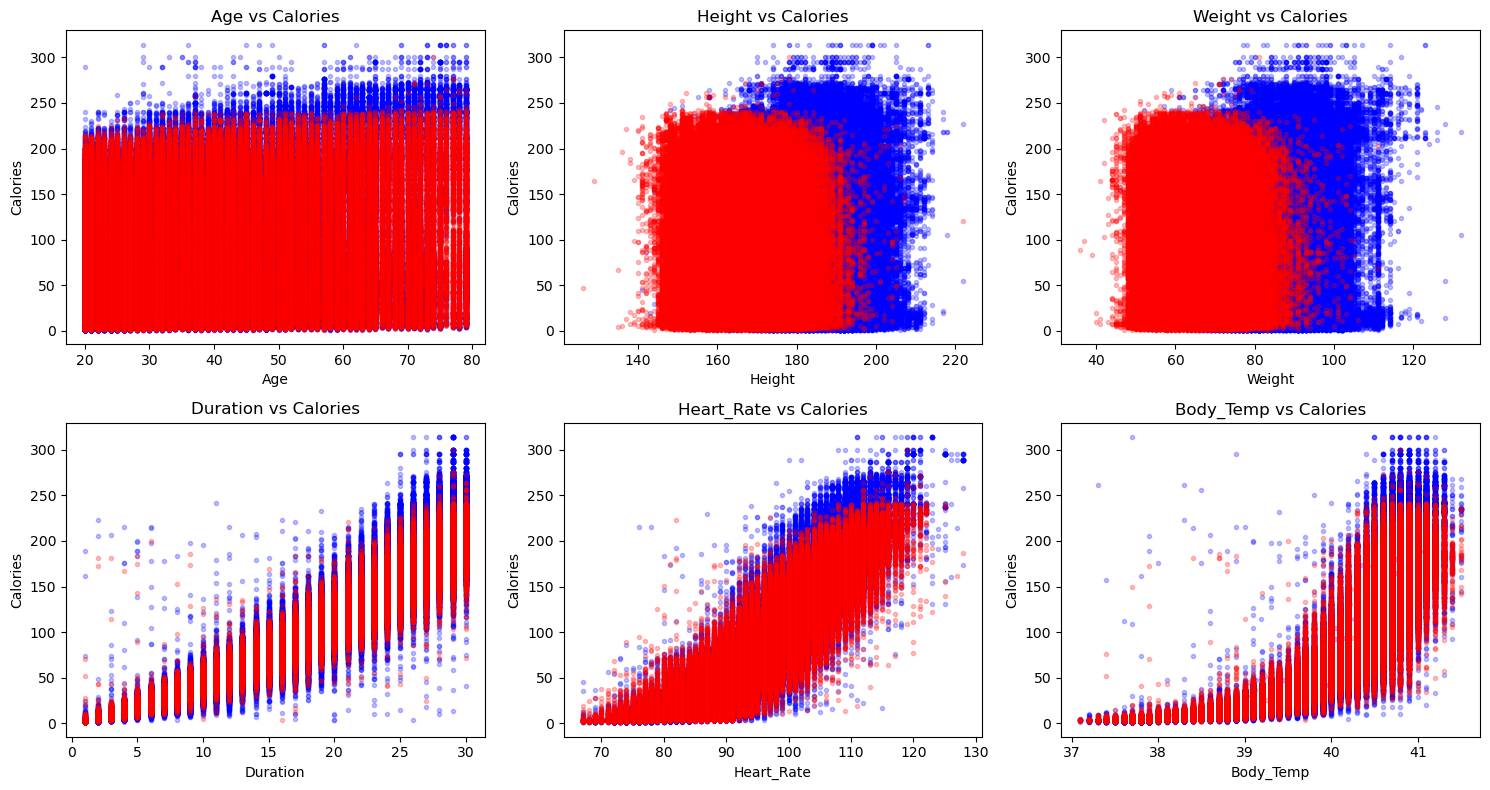

In [12]:
X = train.drop(columns=['Sex', 'Calories'])

n_features = X.shape[1]
n_cols = 3  # Number of plots per row
n_rows = -(-n_features // n_cols)  # Ceiling division

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for idx, column in enumerate(X.columns):
    plt.subplot(n_rows, n_cols, idx + 1)

    # Plot histogram for each gender
    for gender in train['Sex'].dropna().unique():
        subset = train[train['Sex'] == gender]
        plt.scatter(subset[column].dropna(), subset['Calories'], alpha=0.25, marker='.', label=gender, color=colors.get(gender))
        # plt.scatter(X[column], train['Calories'], alpha=0.5)

    
    plt.xlabel(column)
    plt.ylabel('Calories')
    plt.title(f'{column} vs Calories')

plt.tight_layout()
plt.show()

## Add cross term features and expore.

In [13]:
numerical_features = ["Age","Height","Weight","Duration","Heart_Rate","Body_Temp"]

def add_feats(df, numerical_features):
    ''''''''''
    Inputs: dataframe df
    Output: the modified dataframe with cross terms, BMI, id+calories removed, and sex as categorical variable
    '''''''''
    df_new = df.copy()

    features = df_new.columns

    if 'id' in features:
        df_new = df_new.drop(columns=['id'])
    
    if 'Calories' in features:
        df_new = df_new.drop(columns=['Calories'])
    
    
    df_new['Sex'] = df_new['Sex'].astype('category')

    df_new['BMI'] = df_new['Weight']/((df_new['Height']/100)**2)

    df_new['Body_Temp_-_min_sq'] = np.power(df_new['Body_Temp']-df_new['Body_Temp'].min(),2)

    for i in range(len(numerical_features)):
        for j in range(i + 1, len(numerical_features)):  
            feature1 = numerical_features[i]
            feature2 = numerical_features[j]
            cross_term_name = f"{feature1}_x_{feature2}"
            df_new[cross_term_name] = df_new[feature1] * df_new[feature2]
            #cross_term_name = f"{feature1}_divided_{feature2}"
            #df_new[cross_term_name] = df_new[feature1] / df_new[feature2]

    return df_new

In [14]:
X = add_feats(train, numerical_features)
y = train['Calories']

X.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI,Body_Temp_-_min_sq,Age_x_Height,...,Height_x_Weight,Height_x_Duration,Height_x_Heart_Rate,Height_x_Body_Temp,Weight_x_Duration,Weight_x_Heart_Rate,Weight_x_Body_Temp,Duration_x_Heart_Rate,Duration_x_Body_Temp,Heart_Rate_x_Body_Temp
0,male,36,189,82,26,101,41.0,22.955684,15.21,6804,...,15498,4914,19089,7749.0,2132,8282,3362.0,2626,1066.0,4141.0
1,female,64,163,60,8,85,39.7,22.582709,6.76,10432,...,9780,1304,13855,6471.1,480,5100,2382.0,680,317.6,3374.5
2,female,51,161,64,7,84,39.8,24.690405,7.29,8211,...,10304,1127,13524,6407.8,448,5376,2547.2,588,278.6,3343.2
3,male,20,192,90,25,105,40.7,24.414062,12.96,3840,...,17280,4800,20160,7814.4,2250,9450,3663.0,2625,1017.5,4273.5
4,female,38,166,61,25,102,40.6,22.136740,12.25,6308,...,10126,4150,16932,6739.6,1525,6222,2476.6,2550,1015.0,4141.2


Scatterplots of Calories vs numerical features (blue/red corresponds to male/female, respectively).

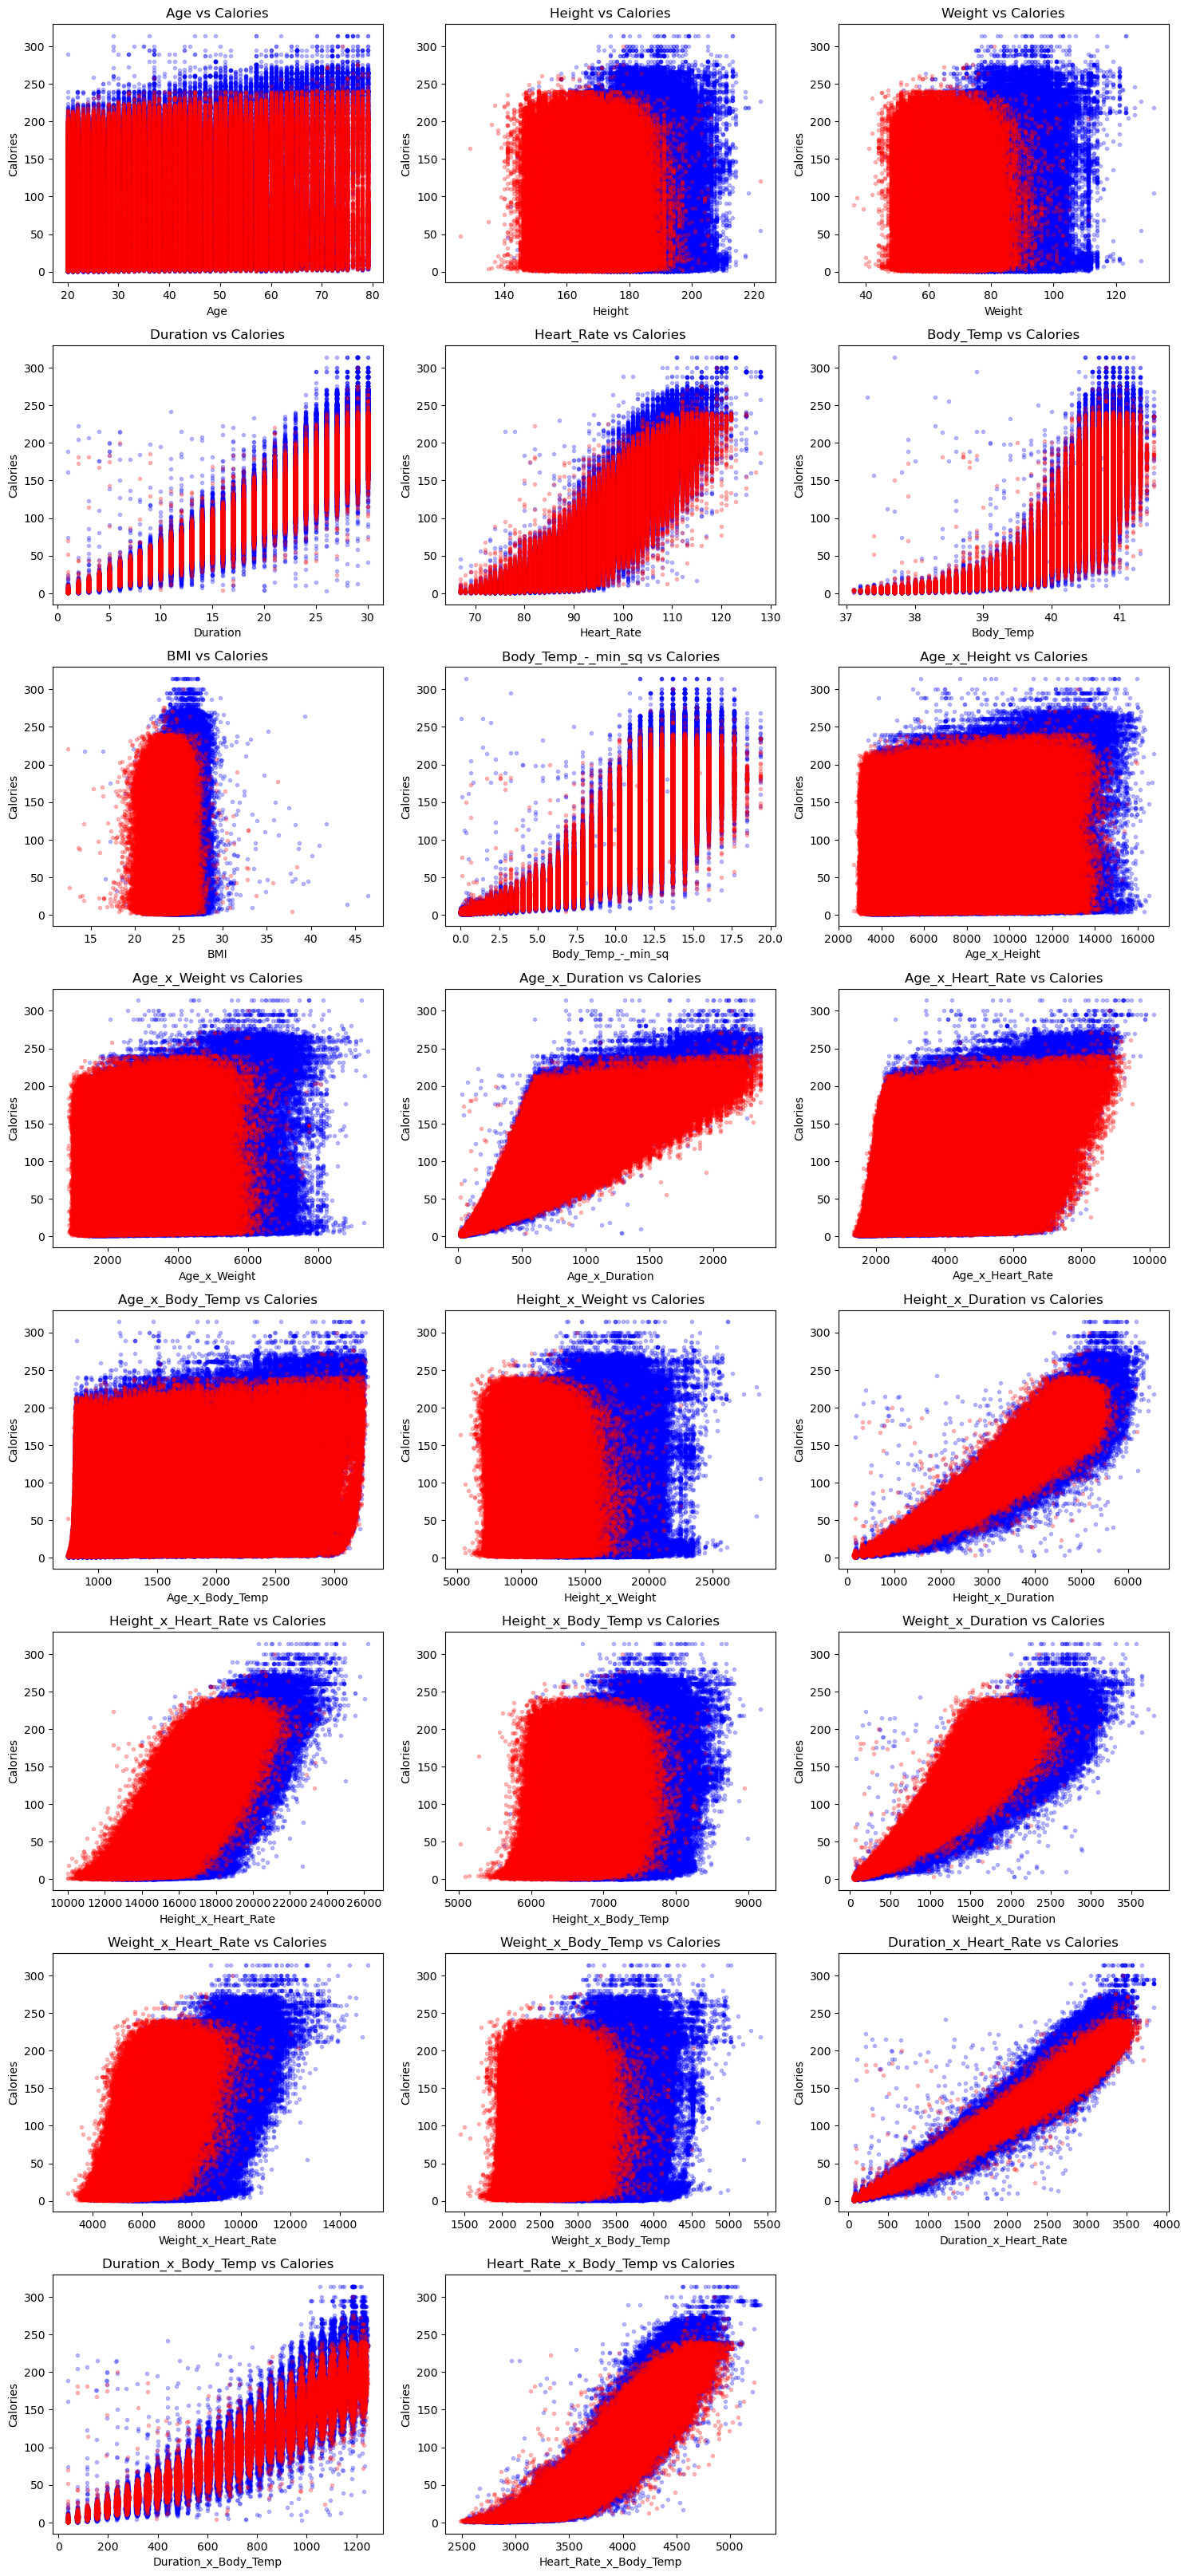

In [15]:
X['Calories'] = y

n_features = X.shape[1]
n_cols = 3  # Number of plots per row
n_rows = -(-n_features // n_cols)  # Ceiling division

# Assign different colors for each sex
colors = {'male': 'blue', 'female': 'red'}

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for idx, column in enumerate(X.drop(columns=['Sex', 'Calories']).columns):
    plt.subplot(n_rows, n_cols, idx + 1)

    # Plot histogram for each gender
    for gender in X['Sex'].dropna().unique():
        subset = X[X['Sex'] == gender]
        plt.scatter(subset[column].dropna(), subset['Calories'], alpha=0.25, marker='.', label=gender, color=colors.get(gender))
        # plt.scatter(X[column], train['Calories'], alpha=0.5)

    
    plt.xlabel(column)
    plt.ylabel('Calories')
    plt.title(f'{column} vs Calories')

plt.tight_layout()
plt.show()

Which features are most correlated to Calories?

C:\Users\eblac\AppData\Local\Temp\ipykernel_2548\4019761400.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


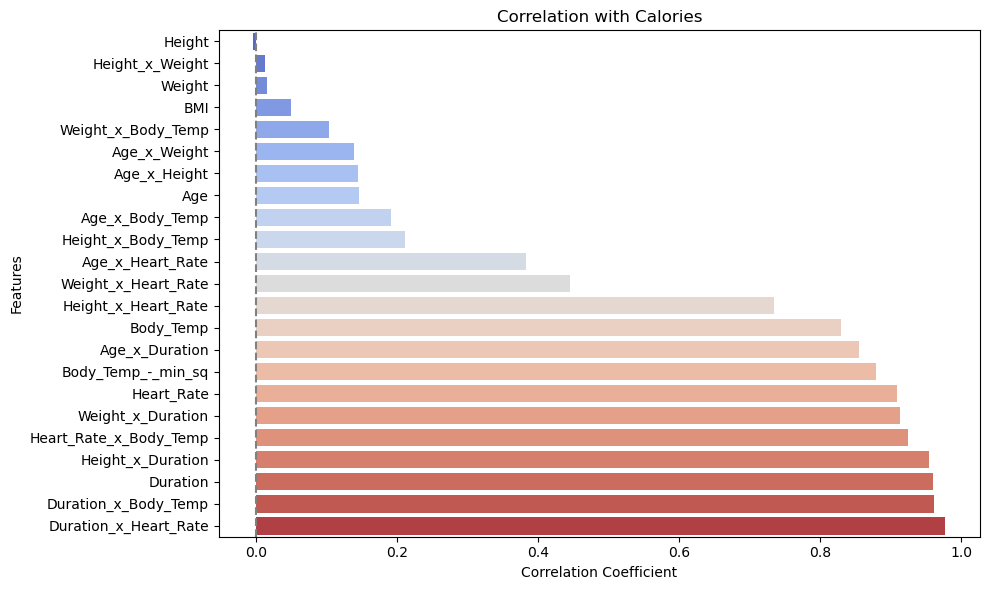

In [16]:
# Compute correlations
correlations = X.corr(numeric_only=True)['Calories'].drop('Calories').sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Correlation with Calories')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()